# PROJECT 4 - TITANIC SURVIVED PREDICTION 
# NAME - SUBHAM
# BATCH - DS2401

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [5]:
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Titanic/titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df.shape

(891, 12)

In [ ]:
#dataset contains 891 rows and 12 columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
#almost all columns have no null values except for age,cabin and embarked
#age and fare are float datatype,most of them are int datatype,name sex ticket cabin embarked are object/string datatype
#sex and embarked may have to be changed to numerical value
# we can remove passengerid,name,ticket

In [10]:
a=df.drop(['PassengerId','Name','Ticket'],axis=1)

In [11]:
a

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S
887,1,1,female,19.0,0,0,30.0000,B42,S
888,0,3,female,NaN,1,2,23.4500,NaN,S
889,1,1,male,26.0,0,0,30.0000,C148,C


In [3]:
#changing string to numerical data
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=le.fit_transform(df[i].values.reshape(-1,1))
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,22.0,1,0,523,7.2500,147,2
1,2,1,1,190,0,38.0,1,0,596,71.2833,81,0
2,3,1,3,353,0,26.0,0,0,669,7.9250,147,2
3,4,1,1,272,0,35.0,1,0,49,53.1000,55,2
4,5,0,3,15,1,35.0,0,0,472,8.0500,147,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548,1,27.0,0,0,101,13.0000,147,2
887,888,1,1,303,0,19.0,0,0,14,30.0000,30,2
888,889,0,3,413,0,NaN,1,2,675,23.4500,147,2
889,890,1,1,81,1,26.0,0,0,8,30.0000,60,0


In [6]:
#checking null data and replacing it with mean or mode
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [91]:
df['Cabin']=df['Cabin'].dropna()

In [ ]:
# null data is present in age , cabin and embarked

In [12]:
b=np.mean(df['Age'])
b

29.69911764705882

In [7]:
df['Age']=df['Age'].fillna(df['Age'].mean())

In [8]:
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode())

In [9]:
df['Cabin']=df['Cabin'].replace('NaN',np.NaN)

In [10]:
df['Cabin']=df['Cabin'].fillna(df['Cabin'].mode())

In [60]:
df['Age'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [61]:
df['Embarked'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Embarked, Length: 891, dtype: bool

In [62]:
df['Cabin'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Cabin, Length: 891, dtype: bool

In [11]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          685
Embarked         2
dtype: int64

In [12]:
#changing string to numerical data
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=le.fit_transform(df[i].values.reshape(-1,1))
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,22.000000,1,0,523,7.2500,47,2
1,2,1,1,190,0,38.000000,1,0,596,71.2833,81,0
2,3,1,3,353,0,26.000000,0,0,669,7.9250,145,2
3,4,1,1,272,0,35.000000,1,0,49,53.1000,55,2
4,5,0,3,15,1,35.000000,0,0,472,8.0500,147,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548,1,27.000000,0,0,101,13.0000,147,2
887,888,1,1,303,0,19.000000,0,0,14,30.0000,30,2
888,889,0,3,413,0,29.699118,1,2,675,23.4500,147,2
889,890,1,1,81,1,26.000000,0,0,8,30.0000,60,0


In [13]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [ ]:
# after label encoding null values are removed from cabin column

In [44]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

PassengerId
1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: count, Length: 891, dtype: int64


Survived
0    549
1    342
Name: count, dtype: int64


Pclass
3    491
1    216
2    184
Name: count, dtype: int64


Name
108    1
98     1
267    1
284    1
566    1
      ..
431    1
518    1
411    1
428    1
220    1
Name: count, Length: 891, dtype: int64


Sex
1    577
0    314
Name: count, dtype: int64


Age
29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
36.500000      1
55.500000      1
0.920000       1
23.500000      1
74.000000      1
Name: count, Length: 89, dtype: int64


SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64


Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64


Ticket
333    7
568    7
80     7
249    6
566    6
      ..
513    1
98     1
212    1
606    1
466    1
Name:

In [ ]:
# most of the data is categorical like pclass,sex,age,sibsp,parch,fare,cabin embarked
#but data is imbalanced we have to do oversamplling later

# DESCRIPTION OF DATASET

In [45]:
df.describe()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,445.000000,0.647587,29.699118,0.523008,0.381594,338.528620,32.204208,130.629630,1.538721
std,257.353842,0.486592,0.836071,257.353842,0.477990,13.002015,1.102743,0.806057,200.850657,49.693429,36.128201,0.794231
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,222.500000,0.000000,22.000000,0.000000,0.000000,158.500000,7.910400,147.000000,1.000000
50%,446.000000,0.000000,3.000000,445.000000,1.000000,29.699118,0.000000,0.000000,337.000000,14.454200,147.000000,2.000000
75%,668.500000,1.000000,3.000000,667.500000,1.000000,35.000000,1.000000,0.000000,519.500000,31.000000,147.000000,2.000000
max,891.000000,1.000000,3.000000,890.000000,1.000000,80.000000,8.000000,6.000000,680.000000,512.329200,147.000000,3.000000


In [ ]:
#1)count is 891 as rows are 891 but cabin null values are not removed
#2)some data are skewed as there is difference between mean and median(50%)
#  right skew data are survived,sibsp,parch,fare,
#  left skewed data are pclass,sex,cabin,embarked
#3)outliers may be prent in age ,sibsp,parch,fare as the values between 75% and max is jumped a lot

<Axes: >

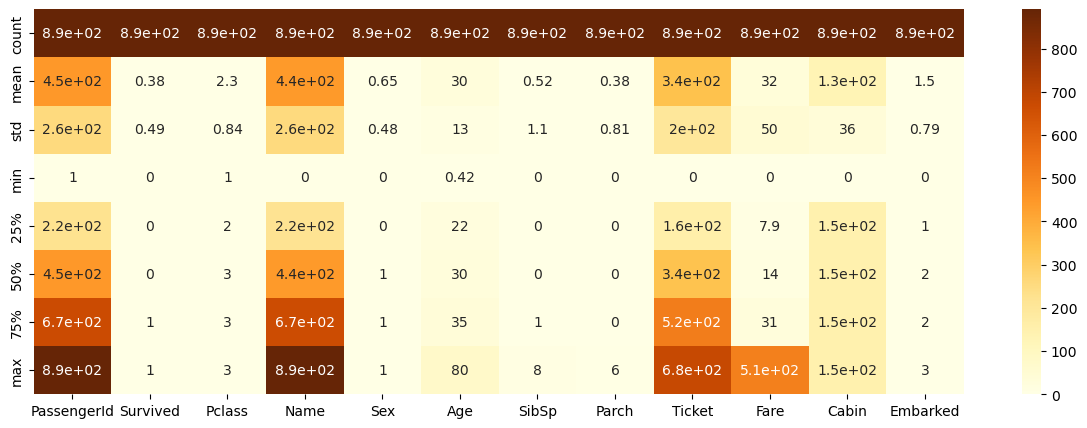

In [50]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.heatmap(df.describe(),cmap='YlOrBr',annot=True)

In [ ]:
# we can see describe fuction values visually as well through seaborns heatmap

In [14]:
df.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Name           0.000000
Sex           -0.618921
Age            0.434488
SibSp          3.695352
Parch          2.749117
Ticket         0.000246
Fare           4.787317
Cabin         -2.153291
Embarked      -1.246689
dtype: float64

In [ ]:
#accepted values are -0.5 to 0.5

In [15]:
df['Pclass']=np.cbrt(df['Pclass'])
df['Sex']=np.cbrt(df['Sex'])
df['SibSp']=np.cbrt(df['SibSp'])
df['Parch']=np.cbrt(df['Parch'])
df['Fare']=np.cbrt(df['Fare'])
df['Cabin']=np.cbrt(df['Cabin'])
df['Embarked']=np.cbrt(df['Embarked'])

In [102]:
#even after removing skewness some skewness still remains we cannot do anything for this skewness

In [16]:
df.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.776838
Name           0.000000
Sex           -0.618921
Age            0.434488
SibSp          1.033059
Parch          1.348334
Ticket         0.000246
Fare           1.230382
Cabin         -2.972815
Embarked      -1.519092
dtype: float64

In [65]:
df['Pclass']=np.log(df['Pclass'])
df['Sex']=np.log(df['Sex'])
df['SibSp']=np.log(df['SibSp'])
df['Parch']=np.log(df['Parch'])
df['Fare']=np.log(df['Fare'])
df['Cabin']=np.log(df['Cabin'])
df['Embarked']=np.log(df['Embarked'])

In [ ]:
# i tried doing another methods of removing skewness but it is causing some problems so i'm removing skewness with
#cuberoot method only

In [66]:
df.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.848796
Name           0.000000
Sex                 NaN
Age            0.434488
SibSp               NaN
Parch               NaN
Ticket         0.000246
Fare                NaN
Cabin               NaN
Embarked            NaN
dtype: float64

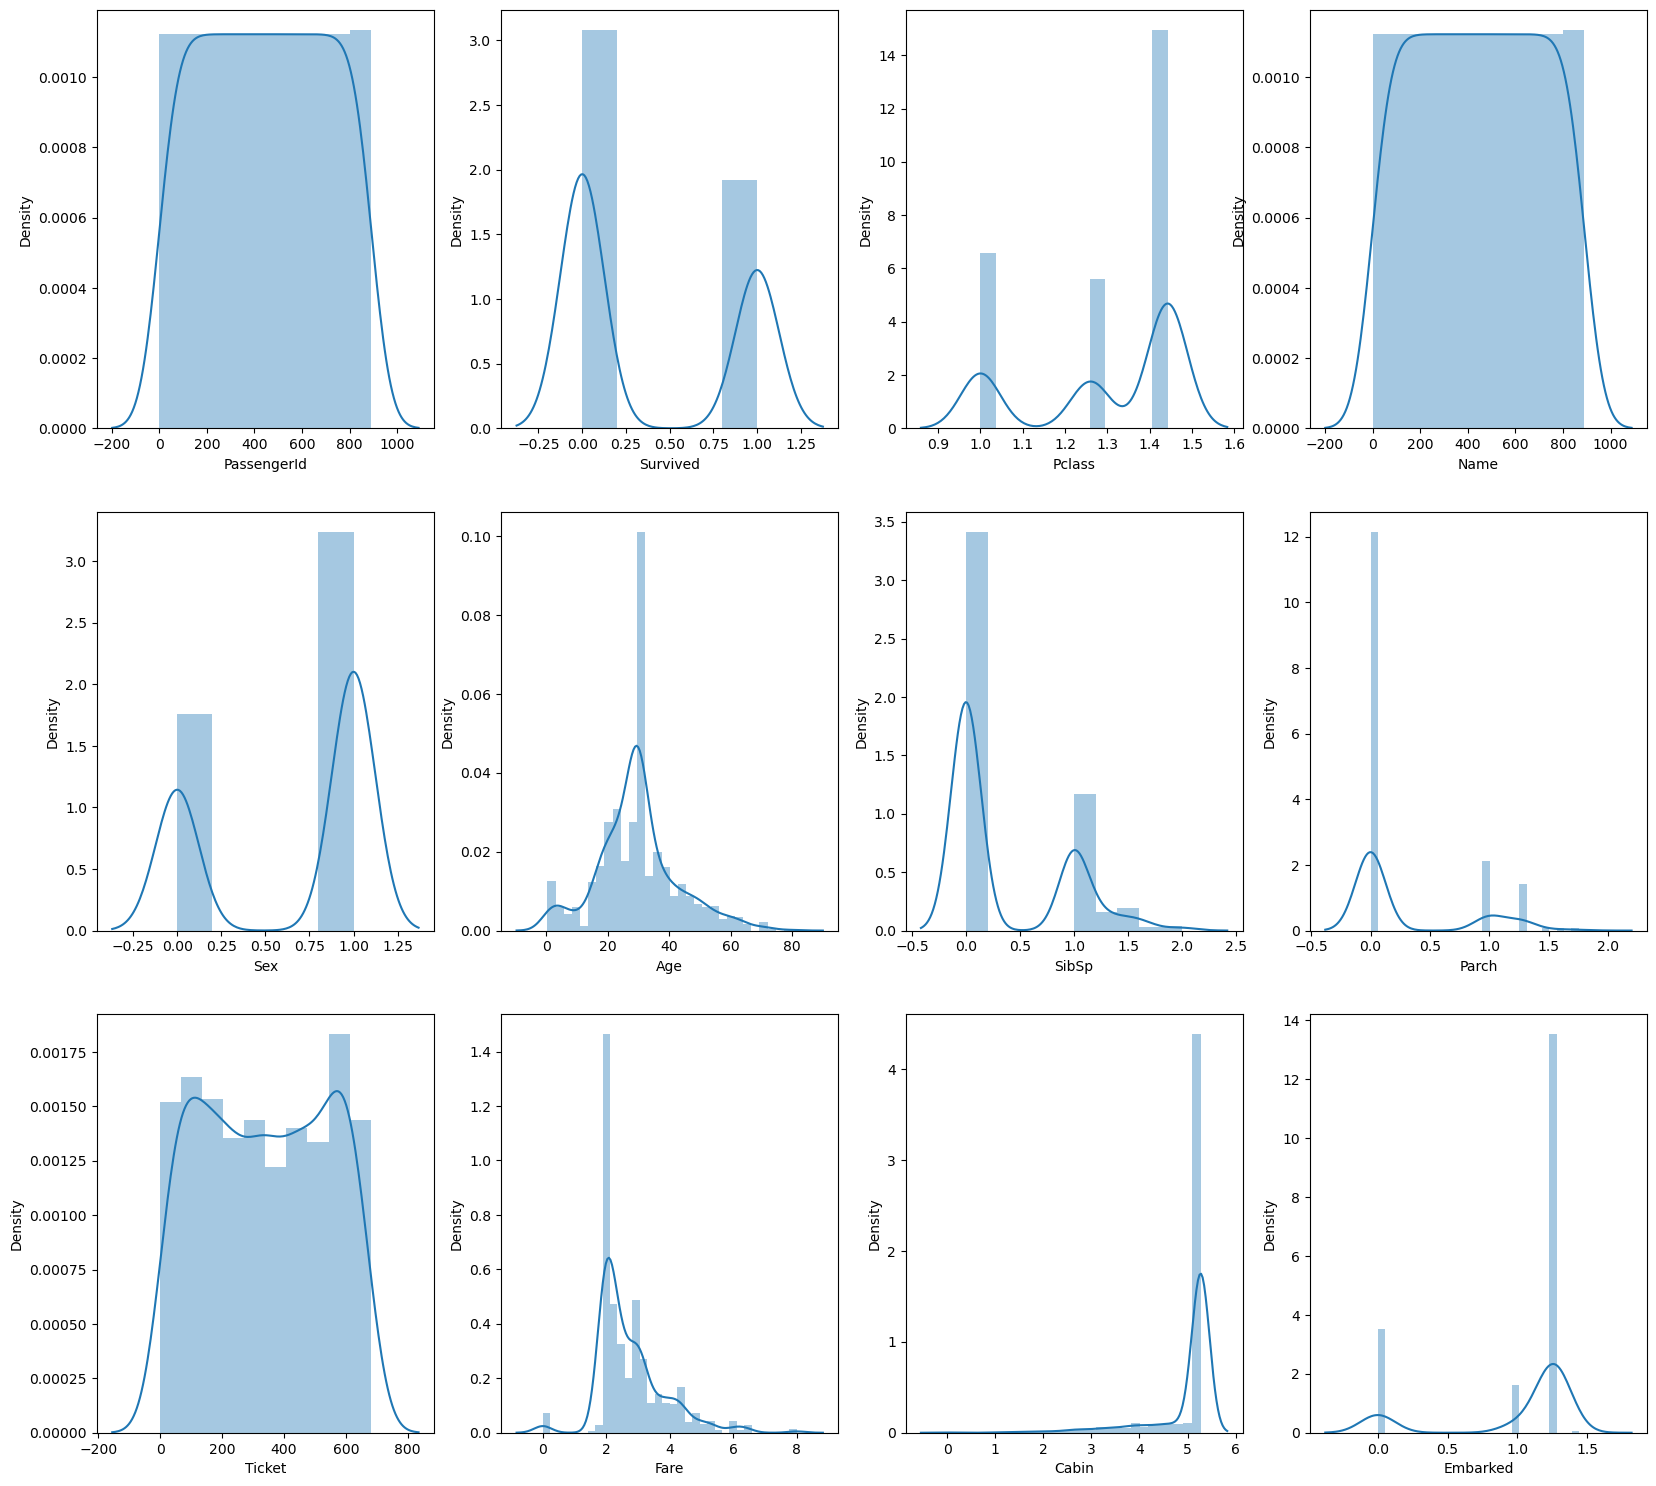

In [17]:
b=df.columns
b
#for checking skewness of multiple columns at the same time
plt.figure(figsize=(20,25))
p=1
for i in b:
    if p<=12:
        ax=plt.subplot(4,4,p)
        sns.distplot(df[i])
    p+=1

In [ ]:
# almost all data is normal distribution except for fare and cabin

# CHECKING FOR OUTLIERS AND REMOVING THEM

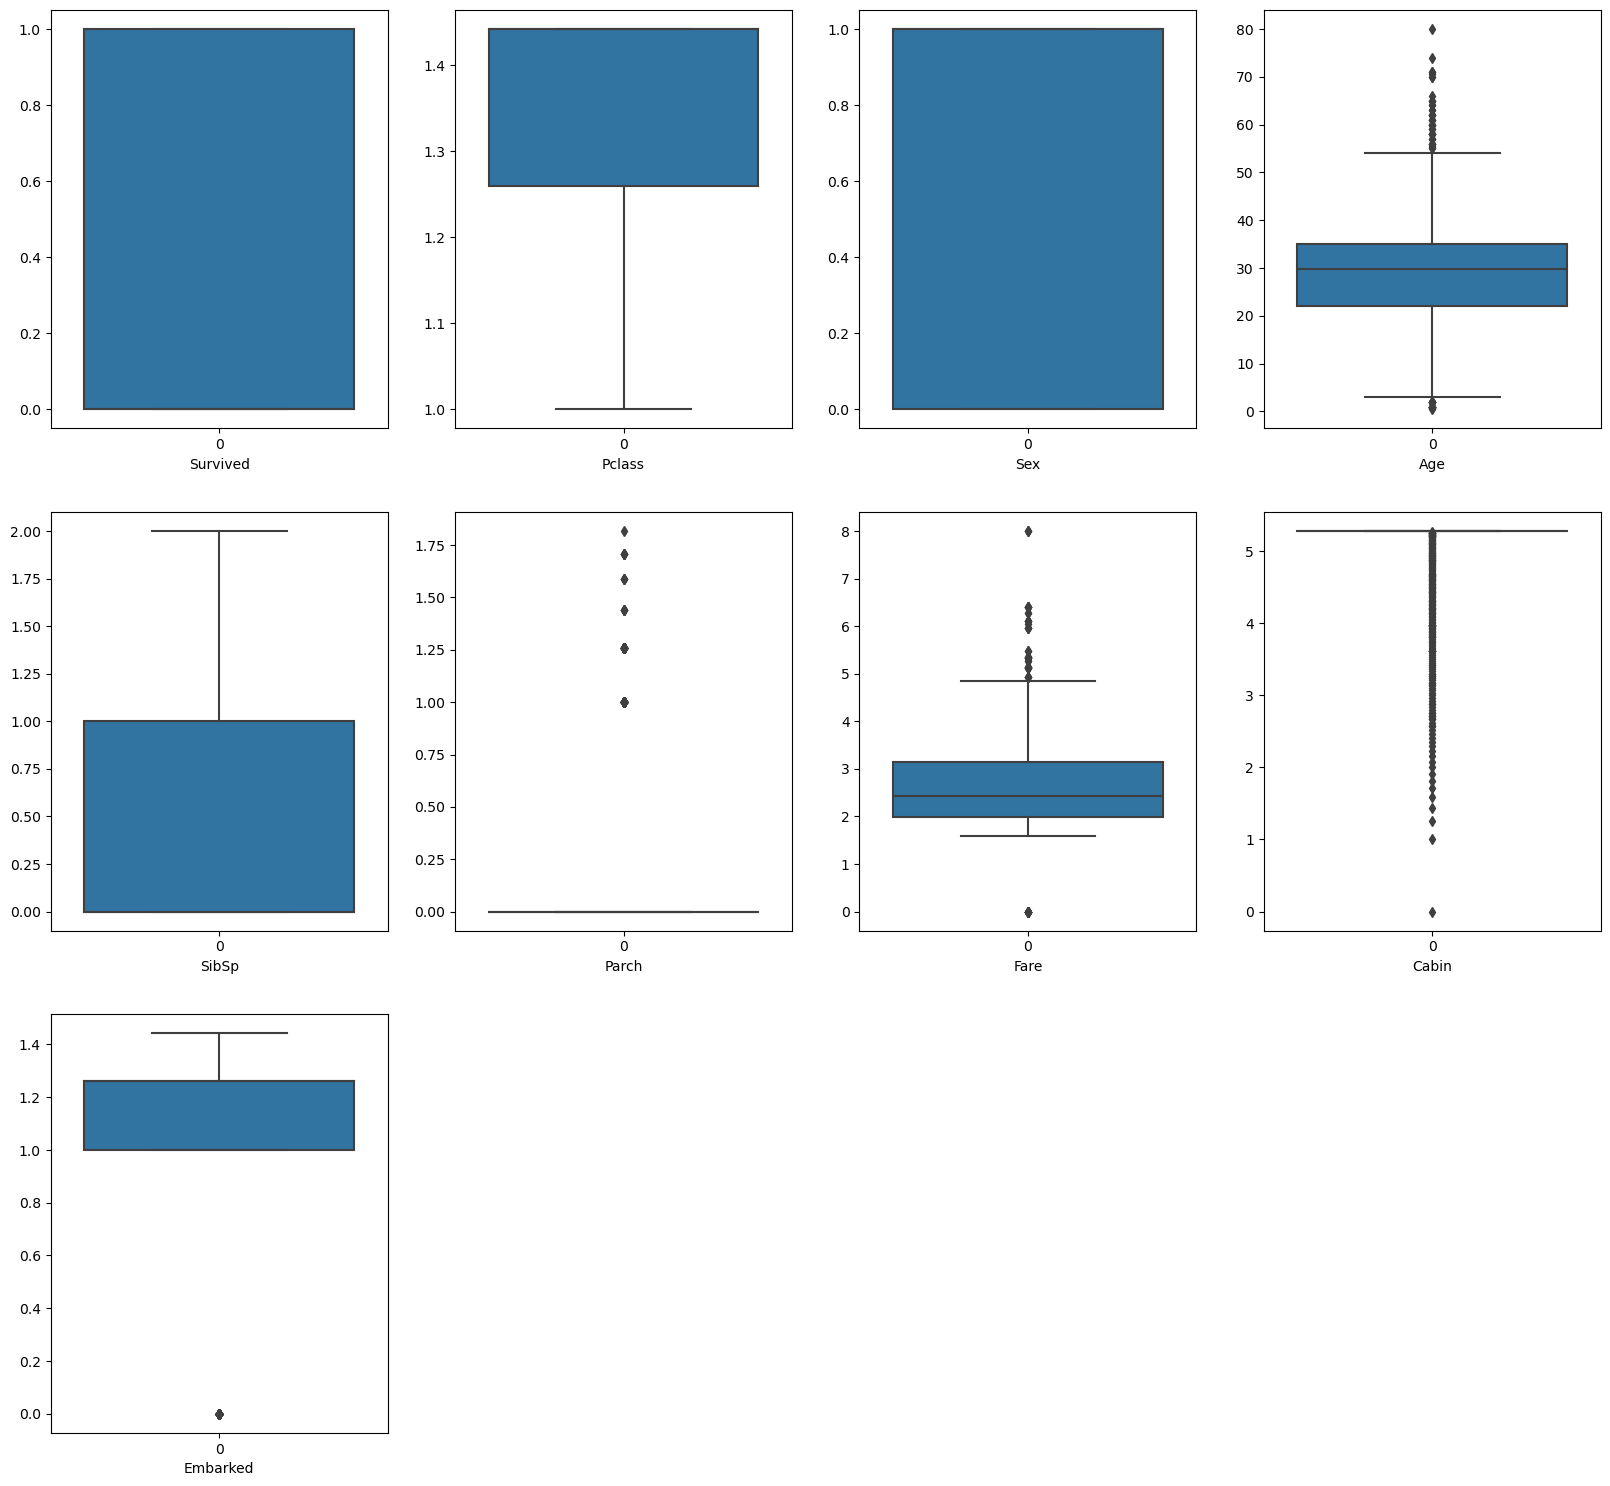

In [89]:
#check for outliers using boxplot
# for multiple boxplot visualization
plt.figure(figsize=(20,25))
p=1
for i in a:
    if p<=12:
        ax=plt.subplot(4,4,p)
        sns.boxplot(df[i])
        plt.xlabel(i)
    p+=1


In [ ]:
# outliers are present in age, parch, fare, cabin, embarked

In [18]:
from scipy.stats import zscore

In [19]:
z=np.abs(zscore(df))
z

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1.730108,0.789272,0.793926,1.310217,0.737695,0.592481,1.187523,0.551654,0.918966,0.774708,1.940323,0.532356
1,1.726220,1.266990,1.629810,0.991410,1.355574,0.638789,1.187523,0.551654,1.282625,1.287903,0.930581,2.051199
2,1.722332,1.266990,0.793926,0.357685,1.355574,0.284663,0.660582,0.551654,1.646283,0.720325,0.372996,0.532356
3,1.718444,1.266990,1.629810,0.672604,1.355574,0.407926,1.187523,0.551654,1.442322,0.926230,1.667289,0.532356
4,1.714556,0.789272,0.793926,1.671790,0.737695,0.407926,0.660582,0.551654,0.664904,0.710596,0.406814,0.532356
...,...,...,...,...,...,...,...,...,...,...,...,...
886,1.714556,0.789272,0.205320,0.400452,0.737695,0.207709,0.660582,0.551654,1.183277,0.386703,0.406814,0.532356
887,1.718444,1.266990,1.629810,0.552079,1.355574,0.823344,0.660582,0.551654,1.616678,0.318502,2.645802,0.532356
888,1.722332,0.789272,0.793926,0.124412,1.355574,0.000000,1.187523,1.999751,1.676173,0.089990,0.406814,0.532356
889,1.726220,1.266990,1.629810,1.415189,0.737695,0.284663,0.660582,0.551654,1.646568,0.318502,1.509883,2.051199


In [20]:
df1=z[(z<3).all(axis=1)]
df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1.730108,0.789272,0.793926,1.310217,0.737695,0.592481,1.187523,0.551654,0.918966,0.774708,1.940323,0.532356
1,1.726220,1.266990,1.629810,0.991410,1.355574,0.638789,1.187523,0.551654,1.282625,1.287903,0.930581,2.051199
2,1.722332,1.266990,0.793926,0.357685,1.355574,0.284663,0.660582,0.551654,1.646283,0.720325,0.372996,0.532356
3,1.718444,1.266990,1.629810,0.672604,1.355574,0.407926,1.187523,0.551654,1.442322,0.926230,1.667289,0.532356
4,1.714556,0.789272,0.793926,1.671790,0.737695,0.407926,0.660582,0.551654,0.664904,0.710596,0.406814,0.532356
...,...,...,...,...,...,...,...,...,...,...,...,...
886,1.714556,0.789272,0.205320,0.400452,0.737695,0.207709,0.660582,0.551654,1.183277,0.386703,0.406814,0.532356
887,1.718444,1.266990,1.629810,0.552079,1.355574,0.823344,0.660582,0.551654,1.616678,0.318502,2.645802,0.532356
888,1.722332,0.789272,0.793926,0.124412,1.355574,0.000000,1.187523,1.999751,1.676173,0.089990,0.406814,0.532356
889,1.726220,1.266990,1.629810,1.415189,0.737695,0.284663,0.660582,0.551654,1.646568,0.318502,1.509883,2.051199


In [21]:
df.shape

(891, 12)

In [22]:
df1.shape

(836, 12)

In [110]:
#55 rows are removed as thier values are outliers

In [23]:
#this is percentage loss of data. max data that we can afford to lose is 10%
# since our value is 6.17% we lose 6.17% data which is within 10% range
#we cannot lose too much data as some data might be essential for model building
(df.shape[0]-df1.shape[0])/(df.shape[0])*100

6.172839506172839

# CHECK FOR CORRELATION AND MULTICOLINEARITY

In [112]:
# we can see correaltion of all columns
df1.corr()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,1.000000,-0.036081,-0.027085,0.009077,-0.014086,0.030022,0.026911,0.024626,-0.056898,-0.059503,-0.027276,0.020576
Survived,-0.036081,1.000000,0.143322,-0.009043,0.544182,0.084753,0.025310,0.130017,0.234064,0.086619,0.159470,0.135684
Pclass,-0.027085,0.143322,1.000000,0.068124,0.037566,0.065993,0.000146,-0.039833,0.259543,0.457705,0.456079,0.236620
Name,0.009077,-0.009043,0.068124,1.000000,0.028794,0.088771,0.049573,0.100817,-0.048471,-0.015265,0.046494,0.057502
Sex,-0.014086,0.544182,0.037566,0.028794,1.000000,0.057363,0.145383,0.255288,0.048474,0.018605,0.096295,0.052721
Age,0.030022,0.084753,0.065993,0.088771,0.057363,1.000000,0.274526,0.334305,0.042975,-0.039836,0.062980,0.025454
SibSp,0.026911,0.025310,0.000146,0.049573,0.145383,0.274526,1.000000,0.442374,-0.063015,-0.104797,-0.005361,-0.013496
Parch,0.024626,0.130017,-0.039833,0.100817,0.255288,0.334305,0.442374,1.000000,-0.039133,-0.090175,0.007289,0.033856
Ticket,-0.056898,0.234064,0.259543,-0.048471,0.048474,0.042975,-0.063015,-0.039133,1.000000,0.208726,0.281545,0.177932
Fare,-0.059503,0.086619,0.457705,-0.015265,0.018605,-0.039836,-0.104797,-0.090175,0.208726,1.000000,0.332419,0.142585


<Axes: >

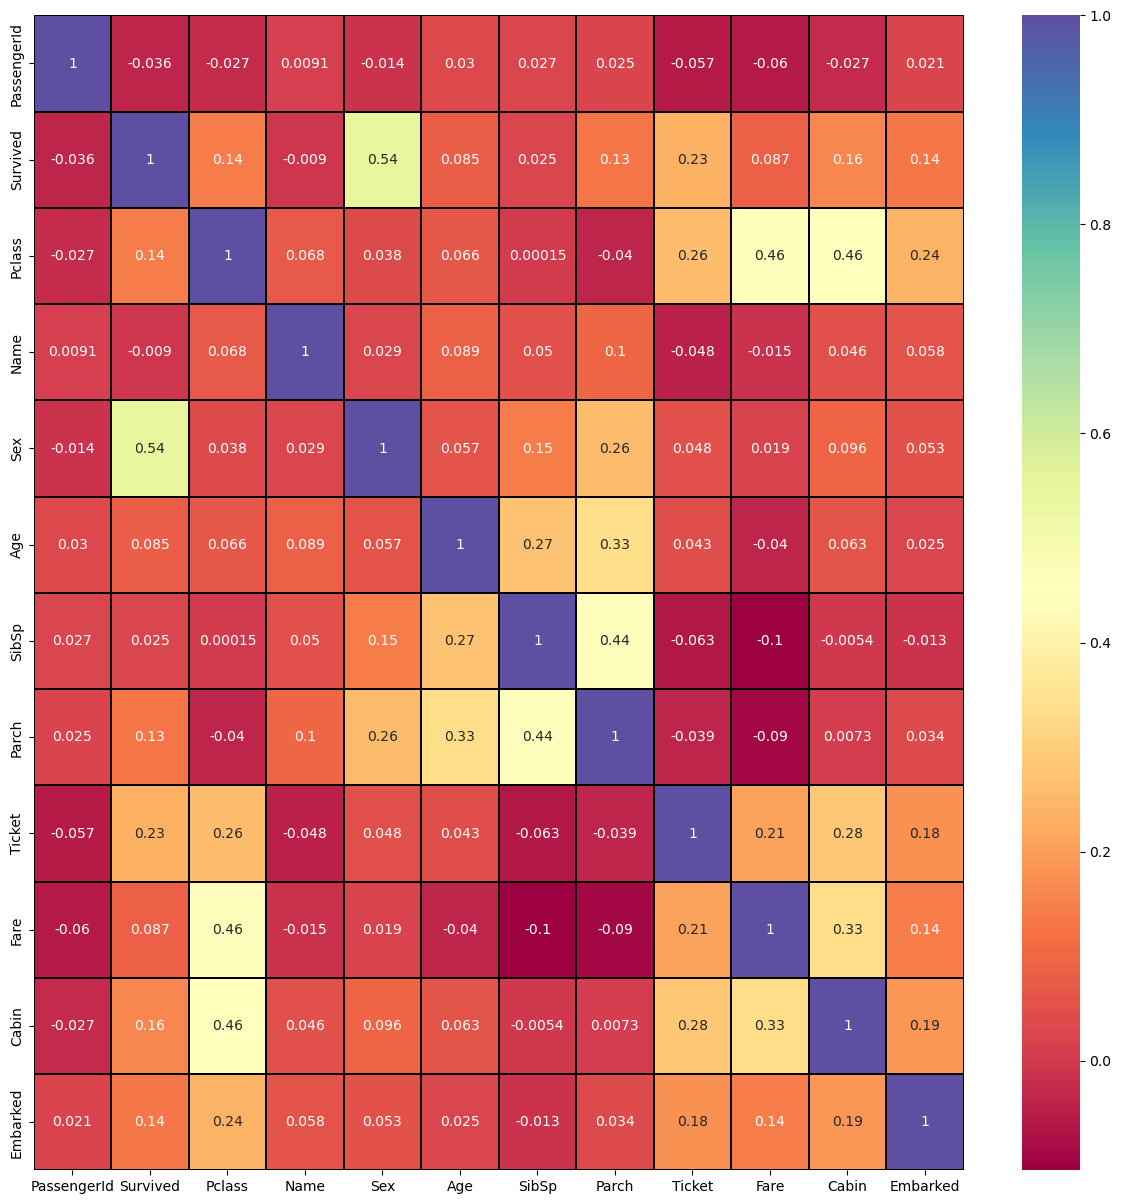

In [113]:
plt.figure(figsize=(15,15))
sns.heatmap(df1.corr(),annot=True,linewidth=0.2,linecolor='black',cmap='Spectral')

In [24]:
# standard scaler is done so as to make all values from whole data on the same level/range.
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
df2=pd.DataFrame(s.fit_transform(df1),columns=df1.columns)
df2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1.731117,-0.779546,-0.092432,0.893482,-0.734571,-0.118852,0.774958,-0.511854,0.148421,0.173898,3.254943,-0.351175
1,1.723369,1.282798,1.698939,0.264729,1.361338,-0.050095,0.774958,-0.511854,0.899881,1.142083,0.937759,2.107774
2,1.715620,1.282798,-0.092432,-0.985109,1.361338,-0.575889,-0.575883,-0.511854,1.651342,0.071301,-0.341804,-0.351175
3,1.707872,1.282798,1.698939,-0.364024,1.361338,-0.392873,0.774958,-0.511854,1.229878,0.459758,2.628376,-0.351175
4,1.700123,-0.779546,-0.092432,1.606580,-0.734571,-0.392873,-0.575883,-0.511854,-0.376571,0.052948,-0.264198,-0.351175
...,...,...,...,...,...,...,...,...,...,...,...,...
831,1.700123,-0.779546,-1.353867,-0.900764,-0.734571,-0.690149,-0.575883,-0.511854,0.694591,-0.558104,-0.264198,-0.351175
832,1.707872,1.282798,1.698939,-0.601723,1.361338,0.223926,-0.575883,-0.511854,1.590167,-0.686770,4.873898,-0.351175
833,1.715620,-0.779546,-0.092432,-1.445172,1.361338,-0.998548,0.774958,2.252194,1.713105,-1.117876,-0.264198,-0.351175
834,1.723369,1.282798,1.698939,1.100510,-0.734571,-0.575889,-0.575883,-0.511854,1.651931,-0.686770,2.267156,2.107774


In [25]:
# vif factor is checked for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(df2.values,i) for i in range(len(df2.columns))]
vif['features']=df2.columns
vif

,VIF values,features
0,1.008839,PassengerId
1,1.547858,Survived
2,1.531559,Pclass
3,1.029027,Name
4,1.523935,Sex
5,1.177155,Age
6,1.294805,SibSp
7,1.409269,Parch
8,1.193407,Ticket
9,1.332349,Fare


In [ ]:
# as we can see all vif values are almost all close to each other and close to 1 means that there is not much multicollinearity
#present in the data

ValueError: Could not interpret input 'i'

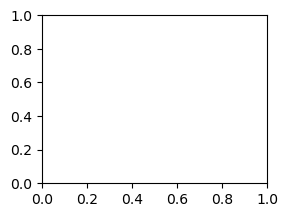

In [126]:
p=1
for i in df2.columns:
    if p<=12:
        ax=plt.subplot(2,2,p)
        sns.countplot(x='i',data=df2[i])
    p+=1
plt.tight_layout()

ValueError: Could not interpret input 'i'

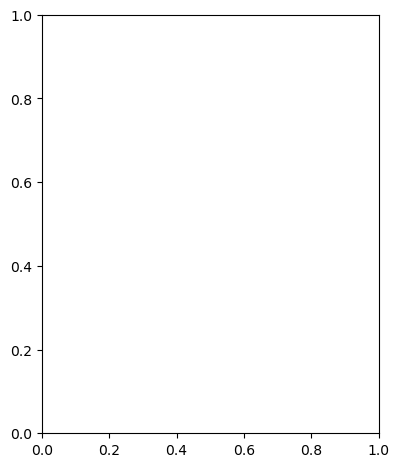

In [125]:
plt.figure(figsize=(20,25))
p=1
for i in df2.columns:
    if p<=12:
        ax=plt.subplot(4,4,p)
        sns.countplot(x='i',data=df[i])
        
    p+=1


<Axes: xlabel='SibSp', ylabel='count'>

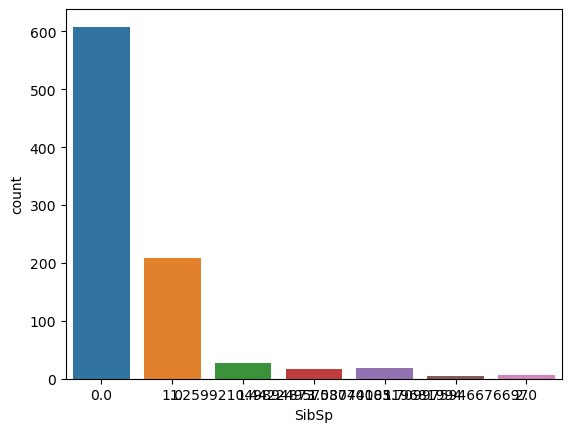

In [121]:
sns.countplot(x='SibSp',data=df)

In [ ]:
#count plot is not plotting

In [131]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
df3=sm.fit_resample(df2)

TypeError: BaseSampler.fit_resample() missing 1 required positional argument: 'y'

In [ ]:
#smote is causing error so i can't balance the data

In [ ]:
#df1 is EDA processed data and df is original data

# MODEL BUILDING

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [27]:
x=df.drop('Survived',axis=1)
y=df['Survived']
print('feature dimension',x.shape)
print('label dimension',y.shape)

feature dimension (891, 11)
label dimension (891,)


In [28]:
maxaccu=0
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    rfr= RandomForestClassifier()
    rfr.fit(x_train,y_train)
    pred=rfr.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxaccu:
        maxaccu=acc
        maxrs=i
print('best accuracy is',maxaccu,'at random state',maxrs)

best accuracy is 0.8768656716417911 at random state 89


In [29]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score

In [31]:
#random forest classifier
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=89)
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
predrfc=rfc.predict(x_test)
print('accuracy score',accuracy_score(y_test,predrfc))
print('confusion matrix',confusion_matrix(y_test,predrfc))
print('classification',classification_report(y_test,predrfc))

accuracy score 0.8731343283582089
confusion matrix [[158  11]
 [ 23  76]]
classification               precision    recall  f1-score   support

           0       0.87      0.93      0.90       169
           1       0.87      0.77      0.82        99

    accuracy                           0.87       268
   macro avg       0.87      0.85      0.86       268
weighted avg       0.87      0.87      0.87       268



In [36]:
x1=df1.drop('Survived',axis=1)
y1=df1['Survived']
print('feature dimension',x1.shape)
print('label dimension',y1.shape)

feature dimension (836, 11)
label dimension (836,)


In [65]:
maxaccu=0
maxrs=0
for i in range(1,200):
    x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.30,random_state=i)
    rfc= RandomForestClassifier()
    rfc.fit(x1_train,y1_train)
    predrfc=rfc.predict(x1_test)
    acc=accuracy_score(y1_test,predrfc)
    if acc>maxaccu:
        maxaccu=acc
        maxrs=i
print('best accuracy is',maxaccu,'at random state',maxrs)

ValueError: Unknown label type: 'continuous'

In [ ]:
# i tried building model with EDA processed data (df1) but it's showing error
# model is build easily on original data (df) 

In [52]:
lr= LogisticRegression()
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.7910447761194029
[[144  25]
 [ 31  68]]
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       169
           1       0.73      0.69      0.71        99

    accuracy                           0.79       268
   macro avg       0.78      0.77      0.77       268
weighted avg       0.79      0.79      0.79       268



In [38]:
svc= SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.6455223880597015
[[164   5]
 [ 90   9]]
              precision    recall  f1-score   support

           0       0.65      0.97      0.78       169
           1       0.64      0.09      0.16        99

    accuracy                           0.65       268
   macro avg       0.64      0.53      0.47       268
weighted avg       0.64      0.65      0.55       268



In [39]:
gbc= GradientBoostingClassifier()
gbc.fit(x_train,y_train)
predgbc=gbc.predict(x_test)
print(accuracy_score(y_test,predgbc))
print(confusion_matrix(y_test,predgbc))
print(classification_report(y_test,predgbc))

0.832089552238806
[[152  17]
 [ 28  71]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       169
           1       0.81      0.72      0.76        99

    accuracy                           0.83       268
   macro avg       0.83      0.81      0.82       268
weighted avg       0.83      0.83      0.83       268



In [40]:
adc= AdaBoostClassifier()
adc.fit(x_train,y_train)
predadc=adc.predict(x_test)
print(accuracy_score(y_test,predadc))
print(confusion_matrix(y_test,predadc))
print(classification_report(y_test,predadc))

0.835820895522388
[[148  21]
 [ 23  76]]
              precision    recall  f1-score   support

           0       0.87      0.88      0.87       169
           1       0.78      0.77      0.78        99

    accuracy                           0.84       268
   macro avg       0.82      0.82      0.82       268
weighted avg       0.84      0.84      0.84       268



In [41]:
bc= BaggingClassifier()
bc.fit(x_train,y_train)
predbc=bc.predict(x_test)
print(accuracy_score(y_test,predbc))
print(confusion_matrix(y_test,predbc))
print(classification_report(y_test,predbc))

0.8134328358208955
[[149  20]
 [ 30  69]]
              precision    recall  f1-score   support

           0       0.83      0.88      0.86       169
           1       0.78      0.70      0.73        99

    accuracy                           0.81       268
   macro avg       0.80      0.79      0.80       268
weighted avg       0.81      0.81      0.81       268



In [42]:
etc= ExtraTreesClassifier()
etc.fit(x_train,y_train)
predetc=etc.predict(x_test)
print(accuracy_score(y_test,predetc))
print(confusion_matrix(y_test,predetc))
print(classification_report(y_test,predetc))

0.8283582089552238
[[151  18]
 [ 28  71]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.87       169
           1       0.80      0.72      0.76        99

    accuracy                           0.83       268
   macro avg       0.82      0.81      0.81       268
weighted avg       0.83      0.83      0.83       268



In [ ]:
# accuracy score of rfc= 87.31% ,lr=79.10% ,svc=64.55% ,gbc=83.20% ,abc=83.58% ,bc=81.34% ,etc=82.83%
#as we can see that rfc has highest accuracy score of 87.31%
#we can also look for other values in confusion matrix and classification report like precision, recall, f1 score etc.  

In [43]:
from sklearn.model_selection import cross_val_score
cvs= cross_val_score
rfcscore=cvs(rfc,x,y)
print(rfcscore)
print(rfcscore.mean())
print('differnce b/w accuracy score and cross val score',accuracy_score(y_test,predrfc)-rfcscore.mean())

[0.7877095  0.80337079 0.87078652 0.83146067 0.84269663]
0.8272048207896553
differnce b/w accuracy score and cross val score 0.04592950756855363


In [53]:
lrscore=cvs(lr,x,y)
print(lrscore)
print(lrscore.mean())
print('differnce b/w accuracy score and cross val score',accuracy_score(y_test,predlr)-lrscore.mean())

[0.77653631 0.80337079 0.75842697 0.75842697 0.79213483]
0.7777791726821919
differnce b/w accuracy score and cross val score 0.01326560343721106


In [46]:
svcscore=cvs(svc,x,y)
print(svcscore)
print(svcscore.mean())
print('differnce b/w accuracy score and cross val score',accuracy_score(y_test,predsvc)-svcscore.mean())

[0.62011173 0.59550562 0.65730337 0.66853933 0.65168539]
0.6386290879417489
differnce b/w accuracy score and cross val score 0.006893300117952639


In [47]:
gbcscore=cvs(gbc,x,y)
print(gbcscore)
print(gbcscore.mean())
print('differnce b/w accuracy score and cross val score',accuracy_score(y_test,predgbc)-gbcscore.mean())

[0.62011173 0.8258427  0.85393258 0.82022472 0.83146067]
0.7903144812001758
differnce b/w accuracy score and cross val score 0.04177507103863021


In [49]:
adcscore=cvs(adc,x,y)
print(adcscore)
print(adcscore.mean())
print('differnce b/w accuracy score and cross val score',accuracy_score(y_test,predadc)-adcscore.mean())

[0.61452514 0.78651685 0.82022472 0.78651685 0.61797753]
0.7251522189441969
differnce b/w accuracy score and cross val score 0.11066867657819113


In [50]:
bcscore=cvs(bc,x,y)
print(bcscore)
print(bcscore.mean())
print('differnce b/w accuracy score and cross val score',accuracy_score(y_test,predbc)-bcscore.mean())

[0.69273743 0.83707865 0.84831461 0.83146067 0.83707865]
0.8093340028874522
differnce b/w accuracy score and cross val score 0.004098832933443375


In [51]:
etcscore=cvs(etc,x,y)
print(etcscore)
print(etcscore.mean())
print('differnce b/w accuracy score and cross val score',accuracy_score(y_test,predetc)-etcscore.mean())

[0.77094972 0.80337079 0.83707865 0.8258427  0.8258427 ]
0.8126169104262131
differnce b/w accuracy score and cross val score 0.01574129852901074


In [ ]:
#difference b/w accuracy score and cross val score of rfc=0.045 , lr=0.013 ,svc=0.006 , gbc=0.041 ,abc=0.110 ,bc=0.004 ,etc=0.015
# accuracy score of rfc= 87.31% ,lr=79.10% ,svc=64.55% ,gbc=83.20% ,abc=83.58% ,bc=81.34% ,etc=82.83%
# cross val score of rfc=82.72% ,lr=77.77% ,svc=63.86% ,gbc=79.03% ,abc=72.51% ,bc=80.93% ,etc=81.26%
# % difference in as and cvs of rfc=4.5% ,lr=1.3% ,svc=0.6% ,gbc=4.1% ,abc=11% ,bc=0.4% ,1.5%
# considering both (difference in cvs and ac) and accuracy score best model should be bagging classifer as accuracy is 81.34%
# and difference is less (0.4%) other models whic are good are etc,gbc,rfc

In [62]:
from sklearn.model_selection import GridSearchCV

params = {'base_estimator__max_depth' : [1, 2, 3, 4, 5],
          'max_samples' : [0.05, 0.1, 0.2, 0.5]}
gcv=GridSearchCV(bc,params,cv=5)
gcv.fit(x_train,y_train)


AttributeError: 'NoneType' object has no attribute 'set_params'

In [ ]:
# hyperparameter tuning showing error 

# SAVING THE MODEL AND LOADING THE MODEL AND PREDICTING BASED ON THE MODEL

In [63]:

import joblib
joblib.dump(bc,'titanic survived project')

['titanic survived project']

In [64]:
model=joblib.load('titanic survived project')
prediction=model.predict(x_test)
prediction

array([1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0], dtype=int64)

In [ ]:
# In regressor models only linear regression works but other models shows error
# In classifier models all models works showing no error